<a href="https://colab.research.google.com/github/giakomorssi/Deloitte_Project/blob/main/Deloitte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prima parte

## Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Change Colab runtime to GPU
import os
os.environ['COLAB_TPU_ADDR'] = ''
os.environ['COLAB_GPU_ALLOC'] = '1'
os.environ['COLAB_GPU'] = '1'
print("Runtime switched to GPU")

import tensorflow as tf

if not tf.test.gpu_device_name():
    print('GPU device not found')
else:
    print('GPU device found:', tf.test.gpu_device_name())

# This code sets the runtime to use the GPU if available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")


pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Runtime switched to GPU
GPU device found: /device:GPU:0
Default GPU Device: /device:GPU:0


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Deloitte/SupplyChainDataset.csv', encoding = 'latin-1')

## Cleaning

### Remove Na and Empty Columns

In [ ]:
df.drop(['Product Description', 'Order Zipcode', 'Customer Email', 'Customer Password'], axis = 1, inplace = True) #empty columns 
df.dropna(inplace = True) #remove 1 missing value

In [ ]:
df.isna().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod 

## Encoding

### Type

In [ ]:
# One-hot encode the TYPE variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Type_Encoded'] = le.fit_transform(df['Type'])

col_c = df.pop('Type_Encoded')
posizione = df.columns.get_loc("Type")
df.insert(posizione+1, 'Type_Encoded', col_c)

print(posizione, '\n')

print("Original labels:", le.classes_, '\n')

0 

Original labels: ['CASH' 'DEBIT' 'PAYMENT' 'TRANSFER'] 



### Delivery Status

In [ ]:
le = LabelEncoder()
df['Delivery Status_Encoded'] = le.fit_transform(df['Delivery Status'])

col_c = df.pop('Delivery Status_Encoded')
posizione = df.columns.get_loc("Delivery Status")
df.insert(posizione+1, 'Delivery Status_Encoded', col_c)

print(posizione, '\n')

print("Original labels:", le.classes_, '\n')

6 

Original labels: ['Advance shipping' 'Late delivery' 'Shipping canceled' 'Shipping on time'] 



### Customer Segment

In [ ]:
le = LabelEncoder()
df['Customer Segment_Encoded'] = le.fit_transform(df['Customer Segment'])

col_c = df.pop('Customer Segment_Encoded')
posizione = df.columns.get_loc("Customer Segment")
df.insert(posizione+1, 'Customer Segment_Encoded', col_c)

print(posizione, '\n')

print("Original labels:", le.classes_, '\n')

16 

Original labels: ['Consumer' 'Corporate' 'Home Office'] 



### Order Status

In [ ]:
le = LabelEncoder()
df['Order Status_Encoded'] = le.fit_transform(df['Order Status'])

col_c = df.pop('Order Status_Encoded')
posizione = df.columns.get_loc("Order Status")
df.insert(posizione+1, 'Order Status_Encoded', col_c)

print(posizione, '\n')

print("Original labels:", le.classes_, '\n')

43 

Original labels: ['CANCELED' 'CLOSED' 'COMPLETE' 'ON_HOLD' 'PAYMENT_REVIEW' 'PENDING'
 'PENDING_PAYMENT' 'PROCESSING' 'SUSPECTED_FRAUD'] 



### Shipping Mode

In [ ]:
le = LabelEncoder()
df['Shipping Mode_Encoded'] = le.fit_transform(df['Shipping Mode'])

col_c = df.pop('Shipping Mode_Encoded')
posizione = df.columns.get_loc("Shipping Mode")
df.insert(posizione+1, 'Shipping Mode_Encoded', col_c)

print(posizione, '\n')

print("Original labels:", le.classes_, '\n')

52 

Original labels: ['First Class' 'Same Day' 'Second Class' 'Standard Class'] 



In [ ]:
df.columns

Index(['Type', 'Type_Encoded', 'Days for shipping (real)',
       'Days for shipment (scheduled)', 'Benefit per order',
       'Sales per customer', 'Delivery Status', 'Delivery Status_Encoded',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Segment', 'Customer Segment_Encoded', 'Customer State',
       'Customer Street', 'Customer Zipcode', 'Department Id',
       'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City',
       'Order Country', 'Order Customer Id', 'order date (DateOrders)',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Order Status_Encoded',
       'Product Card 

In [ ]:
df.head()

,Type,Type_Encoded,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Delivery Status_Encoded,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer Segment_Encoded,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Status_Encoded,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Shipping Mode_Encoded
0,DEBIT,1,3,4,91.250000,314.640015,Advance shipping,0,0,73,Sporting Goods,Caguas,Puerto Rico,Cally,20755,Holloway,Consumer,0,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,2,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,3
1,TRANSFER,3,5,4,-249.089996,311.359985,Late delivery,1,1,73,Sporting Goods,Caguas,Puerto Rico,Irene,19492,Luna,Consumer,0,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,5,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,3
2,CASH,0,4,4,-247.779999,309.720001,Shipping on time,3,0,73,Sporting Goods,San Jose,EE. UU.,Gillian,19491,Maldonado,Consumer,0,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,3
3,DEBIT,1,3,4,22.860001,304.809998,Advance shipping,0,0,73,Sporting Goods,Los Angeles,EE. UU.,Tana,19490,Tate,Home Office,2,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,2,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,3
4,PAYMENT,2,2,4,134.210007,298.250000,Advance shipping,0,0,73,Sporting Goods,Caguas,Puerto Rico,Orli,19489,Hendricks,Corporate,1,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,6,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,3


## Check Columns

### Benefit Per Order and Order Profit Per Order

In [ ]:
# these two columns are the same
(df['Order Profit Per Order'] == df['Benefit per order']).sum()

#remove one
df.drop(['Order Profit Per Order'], inplace = True, axis = 1)

In [ ]:
len([x for x in df['Benefit per order'] if x < 0])
# decide what to do with negatives

33782

# Fraud Detection

## Fraud Column 3 Classes

### Order Status



1. **COMPLETE:** The order or transaction has been successfully fulfilled and completed.
2. **PENDING**: The order or transaction is still in progress and has not yet been completed.
3. **CLOSED**: The order or transaction has been closed or terminated for some reason, such as a return or cancellation.
4. **PENDING_PAYMENT**: The order or transaction is awaiting payment before it can be processed.
5. **CANCELED**: The order or transaction has been canceled by the customer or the seller for some reason.
6. **PROCESSING**: The order or transaction is being processed by the seller or merchant.
7. **SUSPECTED_FRAUD**: The order or transaction is under review due to suspected fraudulent activity.
8. **ON_HOLD**: The order or transaction has been placed on hold for some reason, such as a delay in shipping or a credit hold.
9. **PAYMENT_REVIEW**: The payment for the order or transaction is under review by the payment processor or financial institution.

In [ ]:
# Regular -> Complete, Pending, Pending_Payment, Processing
# Suspected -> Closed, Canceled, On_Hold, Payment_Review
# Fraud -> Suspected_Fraud

# define dictionaries to map status values to categories
regular_dict = {'COMPLETE': 'Regular', 'PENDING': 'Regular', 'PENDING_PAYMENT': 'Regular', 'PROCESSING': 'Regular'}
suspected_dict = {'CLOSED': 'Suspected', 'CANCELED': 'Suspected', 'ON_HOLD': 'Suspected', 'PAYMENT_REVIEW': 'Suspected'}
fraud_dict = {'SUSPECTED_FRAUD': 'Fraud'}

# create a function to map status values to categories
def map_category(status):
    if status in regular_dict:
        return regular_dict[status]
    elif status in suspected_dict:
        return suspected_dict[status]
    elif status in fraud_dict:
        return fraud_dict[status]
    else:
        return 'Unknown'

# apply the function to the 'status' column to create a new 'category' column
df['Category'] = df['Order Status'].apply(map_category)

In [ ]:
le = LabelEncoder()
df['Category_Encoded'] = le.fit_transform(df['Category'])

col_c = df.pop('Category_Encoded')
posizione = df.columns.get_loc("Category")
df.insert(posizione+1, 'Category_Encoded', col_c)

print(posizione, '\n')

print("Original labels:", le.classes_, '\n')
print("labels:", '\n',df['Category_Encoded'], '\n')

53 

Original labels: ['Fraud' 'Regular' 'Suspected'] 

labels: 
 0         1
1         1
2         2
3         1
4         1
         ..
180514    2
180515    1
180516    1
180517    1
180518    1
Name: Category_Encoded, Length: 180508, dtype: int64 



In [ ]:
print('Regular: ', len([x for x in df['Category'] if x == 'Regular']), '\n')
print('Suspected: ', len([x for x in df['Category'] if x == 'Suspected']), '\n')
print('Fraud: ', len([x for x in df['Category'] if x == 'Fraud']))

Regular:  141442 

Suspected:  35004 

Fraud:  4062


In [ ]:
# df.to_csv('Deloitte.csv')

### Data preprocessing


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

s = StandardScaler()

df_nn = df.drop(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Segment', 'Customer State',	'Customer Street', 'Department Name', 
       'Market', 'Order City', 'Order Country', 'Order Customer Id', 'Order Region',	
       'Order State', 'Order Status', 'Product Image',	'Product Name', 'Shipping Mode', 'Category',
       'shipping date (DateOrders)', 'order date (DateOrders)', 'Category Id', 'Customer Zipcode', 
       'Department Id', 'Latitude',	'Longitude', 'Order Id',	'Order Item Cardprod Id',
       'Order Item Id', 'Product Card Id', 'Product Category Id'], axis = 1)

X = df_nn.drop('Category_Encoded', axis = 1)
y = df_nn['Category_Encoded']

X = s.fit_transform(X)

In [ ]:
y.value_counts()

1    141442
2     35004
0      4062
Name: Category_Encoded, dtype: int64

### PCA

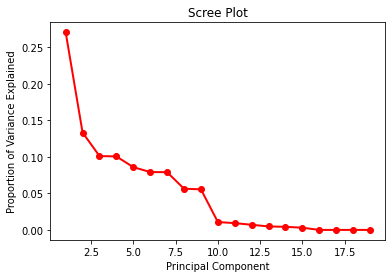

Number of components to keep: 9


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize a PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(X)

# Create a scree plot
num_components = len(pca.explained_variance_ratio_)
plt.plot(np.arange(1, num_components+1), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

# Determine the number of components to keep
variance_threshold = 0.95
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components_to_keep = np.argmax(cumulative_variance_ratio >= variance_threshold) + 1

print(f'Number of components to keep: {num_components_to_keep}')

# Transform the data using the chosen number of components
pca = PCA(n_components=num_components_to_keep)
X_pca = pca.fit_transform(X)

### Split the data into training and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=4, stratify=y)

In [ ]:
w_f = y_train.value_counts()[0] / len(y_train)
w_r = y_train.value_counts()[1] / len(y_train)
w_s = y_train.value_counts()[2] / len(y_train)


print(f"Fraudulant transaction weight: {w_f}")
print(f"Non-Fraudulant transaction weight: {w_r}")
print(f"Suspected transaction weight: {w_s}")

Fraudulant transaction weight: 0.022505990055814856
Non-Fraudulant transaction weight: 0.7835754747032672
Suspected transaction weight: 0.19391853524091796


In [ ]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (144406, 9), y_train: (144406,)

TESTING: X_test: (36102, 9), y_test: (36102,)


### Grid Search XGBoost Model

In [ ]:
'''import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

# Define the parameter grid to search over
param_grid = {
    'max_depth': [5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100]
}

# Create an XGBoost classifier object
xgb = XGBClassifier(objective='multi:softmax', num_class=3)

# Perform a grid search over the parameter grid using cross-validation
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=3, verbose=3)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)

# Use the best hyperparameters to train the model and make predictions on the testing set

best_xgb = XGBClassifier(objective='multi:softmax', num_class=3, **grid_search.best_params_)
best_xgb.fit(X_train, y_train)

# save the model

with open('best_xgb.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)'''

### Load the model and make predictions on the test set

In [ ]:
import pickle

# Load the saved XGBoost model from file
with open('/content/drive/MyDrive/Deloitte/best_xgb.pkl', 'rb') as f:
    best_xgb = pickle.load(f)

# Use the loaded model to make predictions on the test data
y_pred = best_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score: ", accuracy_score(y_test, y_pred))
print('recall score:', recall_score(y_test, y_pred, average="macro"))
print('precision score:', precision_score(y_test, y_pred, average="macro"))
print('f1 score:', f1_score(y_test, y_pred, average="macro"))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
